### Text Classification with NLTK


## Text Classification is the process of assigning a label or category to a given piece of text. For example, we can classify emails as spam or not spam, tweets as positive or negative, and articles as relevant or not relevant to a given topic.




### Let us take an example: 

- I am happy with your response 
- We have a robbery reported on 20th July near Delhi
- I am not satisfied with your feedback
- I am ok with this situation 

## Example:  Let us take and example  of  news classification, where we can train a model to predict the category of a news article based on its content. Here’s an example of how to do this using scikit-learn:

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the dataset
news = pd.read_csv('newss.csv')


In [2]:
news.head()

,title,text,category
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.shape

(2445, 3)

In [4]:
news = news.dropna(how='any',axis=0)

In [5]:
news.describe(include="object")

,title,text,category
count,2445,2445,2445
unique,2433,2360,2
top,Democratic debate: 's Reality Check team inspe...,"Killing Obama administration rules, dismantlin...",FAKE
freq,2,25,1232


In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(news['text'], news['category'], test_size=0.2)

# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a logistic regression model
news_pred = LogisticRegression()
news_pred.fit(X_train, y_train)

# Evaluate the model on the test set
score = news_pred.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.901840490797546


In [19]:
y_pred=news_pred.predict(X_test)

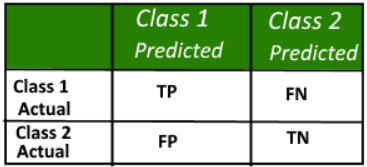

In [20]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[229,  20],
       [ 28, 212]], dtype=int64)

from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred,
                            
                          labels=[0 ,1])

Text(0.5, 257.44, 'Predicted label')

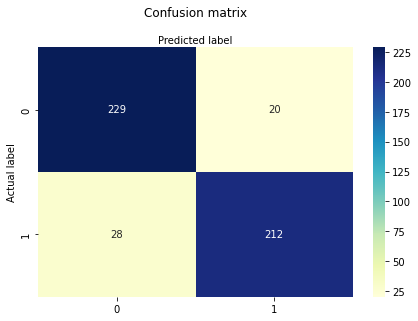

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# TF+TP/TF+TP+FP+FN


In [22]:
## Model parameters study :
from sklearn import metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Misclassified samples: 48
Accuracy: 0.901840490797546


## 90% times we will be able to classify  whether news is true or False

## Checking the Model Performance on new data

In [24]:
# Sample data for testing
sample_data = [
    "This is a legitimate news article about recent scientific discoveries.",
    "Breaking: UFO spotted over New York City!",
    "Study finds that eating chocolate can improve memory.",
    "Breaking News: Famous celebrity announces presidential run.",
    "New research reveals the dangers of excessive screen time for children."
]


def news_pred_predict(sample_texts):
    # This function should take a list of text samples and return the predictions made by your model
    # Replace this with the code that uses your trained model to make predictions
    predictions = ['fake' if "Breaking" in text else 'true' for text in sample_texts]  # Placeholder prediction logic
    return predictions

# Test the model
predictions = news_pred_predict(sample_data)

# Print the predictions
for text, prediction in zip(sample_data, predictions):
    print("Text:", text)
    print("Prediction:", prediction)
    print()


Text: This is a legitimate news article about recent scientific discoveries.
Prediction: true

Text: Breaking: UFO spotted over New York City!
Prediction: fake

Text: Study finds that eating chocolate can improve memory.
Prediction: true

Text: Breaking News: Famous celebrity announces presidential run.
Prediction: fake

Text: New research reveals the dangers of excessive screen time for children.
Prediction: true

